<a href="https://colab.research.google.com/github/meliisyyilmaz/YoutubeSpam/blob/main/YoutubeSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import numpy as np
import pandas as pd


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score




from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA, TruncatedSVD

import matplotlib.patches as mpatches
from nltk import word_tokenize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df1=pd.read_csv('Youtube01-Psy.csv')
df1

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [ ]:
df=df1.iloc[:,3:5]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df['CONTENT'], df['CLASS'], test_size=0.2,shuffle=True)


In [ ]:
#Collect all the comments we have in "CONTENT", and transform it in token (by words)
count_vectorizer = CountVectorizer()
x_train = count_vectorizer.fit_transform(X_train)

In [ ]:
#Let's see the dimension after vectorizer
print("\nDimensions of training data:", X_train.shape)
X_train


Dimensions of training data: (280,)


23                              just checking the views﻿
318    Check out my Music Videos! and PLEASE SUBSCRIB...
163                           I found out this song now﻿
305                    please throw a sub on my channel﻿
6                              Subscribe to my channel ﻿
                             ...                        
254    How did THIS Video in all of YouTube get this ...
274    You know a song sucks dick when you need to us...
14     please like :D https://premium.easypromosapp.c...
328    Haha its so funny to see the salt of westerner...
0      Huh, anyway check out this you[tube] channel: ...
Name: CONTENT, Length: 280, dtype: object

In [ ]:
#Comparing the number of time a word appears adding a weight to it, so we can see if
#the word is important in the the model, basically if a word appears many times,
#for instance,the word "and", it will have a low weight,however if we compare to the
#word "subscribe" may not appear so often then the weight it will be higher.

tfidf = TfidfTransformer()
train_tfidf = tfidf.fit_transform(x_train)


# Naive Bayes classifier -- to gives the tag with the highest probability (get the words
# we trated before based on the wighets added in the trasformer section)
classifier = MultinomialNB().fit(train_tfidf, y_train)
print(train_tfidf)

  (0, 1071)	0.4001885472857077
  (0, 991)	0.3364417290228571
  (0, 577)	0.487219094441407
  (0, 254)	0.6994809815893215
  (1, 1063)	0.20272376151310242
  (1, 952)	0.15925974232532253
  (1, 851)	0.301361644989599
  (1, 793)	0.1675882384976507
  (1, 757)	0.15925974232532253
  (1, 711)	0.13336607072989975
  (1, 708)	0.19922652356419576
  (1, 604)	0.602723289979198
  (1, 581)	0.301361644989599
  (1, 531)	0.301361644989599
  (1, 433)	0.301361644989599
  (1, 269)	0.2378592845285541
  (1, 253)	0.1446771827171352
  (1, 151)	0.13620923709010932
  (2, 1004)	0.2752487945659333
  (2, 917)	0.393911277243106
  (2, 757)	0.3443702786893883
  (2, 733)	0.4752332389435143
  (2, 423)	0.6516398441695805
  (3, 1006)	0.6128974181710967
  (3, 950)	0.48374882404363884
  :	:
  (278, 1016)	0.2214178398936418
  (278, 1011)	0.19335768092982142
  (278, 1001)	0.18221509731407512
  (278, 991)	0.19335768092982142
  (278, 990)	0.15709025179896366
  (278, 911)	0.1417824429942592
  (278, 881)	0.18221509731407512
  (278, 

In [ ]:
# Store all the comments array in a variable
input_data = np.array(df["CONTENT"])


# Transform input data using count vectorizer
input_tc = count_vectorizer.transform(input_data)
type(input_tc)
print(input_tc)
# Transform vectorized data using tfidf transformer
input_tfidf = tfidf.transform(input_tc)
type(input_tfidf)
print(input_tfidf)
# Predict the output categories
predictions = classifier.predict(input_tfidf)

  (0, 161)	1
  (0, 252)	1
  (0, 253)	1
  (0, 527)	1
  (0, 595)	1
  (0, 757)	1
  (0, 1004)	1
  (0, 1029)	1
  (0, 1145)	1
  (1, 151)	2
  (1, 252)	1
  (1, 253)	1
  (1, 279)	1
  (1, 413)	1
  (1, 482)	1
  (1, 511)	1
  (1, 544)	1
  (1, 556)	1
  (1, 614)	1
  (1, 619)	1
  (1, 691)	1
  (1, 692)	1
  (1, 711)	1
  (1, 721)	1
  (1, 756)	1
  :	:
  (348, 711)	1
  (348, 783)	2
  (348, 792)	1
  (348, 793)	1
  (348, 938)	1
  (348, 989)	1
  (349, 151)	1
  (349, 193)	1
  (349, 205)	3
  (349, 234)	1
  (349, 413)	2
  (349, 491)	1
  (349, 523)	1
  (349, 558)	1
  (349, 755)	1
  (349, 839)	1
  (349, 881)	1
  (349, 947)	1
  (349, 991)	3
  (349, 1001)	1
  (349, 1004)	1
  (349, 1011)	1
  (349, 1067)	1
  (349, 1086)	1
  (349, 1101)	1
  (0, 1145)	0.22614301669185982
  (0, 1029)	0.4440942171292483
  (0, 1004)	0.18758275607640265
  (0, 757)	0.23468922394092623
  (0, 595)	0.4440942171292483
  (0, 527)	0.4440942171292483
  (0, 253)	0.21319999164939804
  (0, 252)	0.22415095597193957
  (0, 161)	0.41380684530941975
  (1, 

In [ ]:

#confusion matrix
confusion_matrix = confusion_matrix(np.array(df["CLASS"]),predictions)
confusion_matrix

array([[170,   5],
       [  1, 174]])

it is pretty good result

##word2vec

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

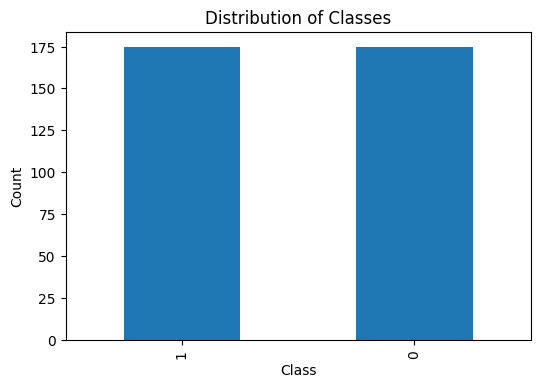

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the CLASS column
plt.figure(figsize=(6, 4))
df['CLASS'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
df['CONTENT_TOKENIZED'] = df['CONTENT'].apply(lambda x: word_tokenize(x.lower()))

In [ ]:
# Train Word2Vec model
sentences = df['CONTENT_TOKENIZED'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Word Embedding Oluşturma
sentences = [content.split() for content in df1['CONTENT']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Özellik Çıkarımı
X = []
for tokens in sentences:
    sentence_vector = np.mean([word2vec_model.wv[token] for token in tokens], axis=0)
    X.append(sentence_vector)
X = np.array(X)

# Eğitim ve test verisi ayırma
X_train, X_test, y_train, y_test = train_test_split(X, df1['CLASS'], test_size=0.2, random_state=42)

# Sınıflandırma Modeli Eğitimi
model = LogisticRegression()
model.fit(X_train, y_train)

# Modelin Değerlendirilmesi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.38571428571428573


maybe dataset is too small for word2vec


